In [52]:
#Given a dataset write a program to show different metrics of Linear Regression
#1. MAE = Mean Absolute    Error
#2. MSE = Mean Squared Error
#3. RMSE
#4. MAPE = Mean Absolute Percentage Error
#5. MPE = Mean Percentage Error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [13]:
salary_data = pd.read_csv('C:/Users/tin2383/Desktop/New folder/Salary_Data.csv')

In [14]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
salary_data.shape

(30, 2)

In [15]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [16]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [17]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


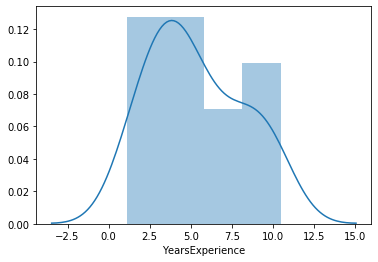

In [19]:
#Univariate analysis - Lets check distribution of Experience
sns.distplot(salary_data['YearsExperience'])

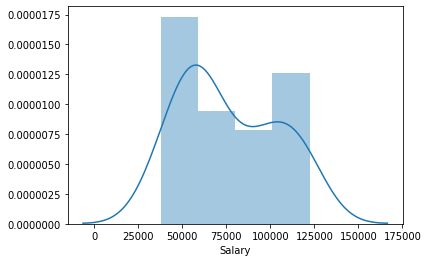

In [20]:
#Univariate analysis - Lets check distribution of Salary
sns.distplot(salary_data['Salary'])

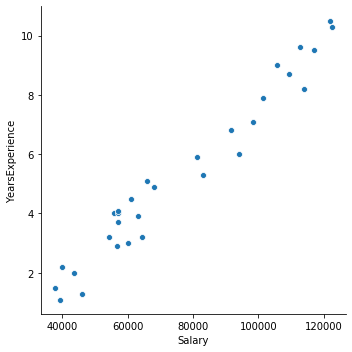

In [21]:
#Bivariate Analysis 
sns.relplot(x='Salary',y='YearsExperience',data=salary_data)

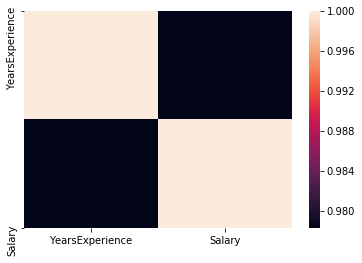

In [22]:
#Dark means Correlationship is High
#Light color means Correlationship is low
sns.heatmap(salary_data.corr())

In [25]:
features = salary_data.iloc[:,:-1].values
target = salary_data.iloc[:,1].values
#print(features)
#print(target)

In [26]:
#Split the data into training and test datasets
#Test data is 30%
feature_train, feature_test, target_train, target_test = train_test_split(features,target,test_size=0.3,random_state=42)

In [28]:
#print('feature_train :',feature_train)
#print('feature_test :',feature_test)
#print('target_train :',target_train)
#print('target_test :',target_test)

In [42]:
#We have divided the data, lets try to fit the model using LinearRegression
LinReg = LinearRegression()
model = LinReg.fit(feature_train,target_train)

In [32]:
#Predict from test data set
y_predict = LinReg.predict(feature_test)
y_predict

array([115573.62288352,  71679.93878159, 102498.90847018,  75415.57147111,
        55803.4998511 ,  60473.04071301, 122110.98009019, 107168.44933209,
        63274.76523015])

Text(0, 0.5, 'Salary')

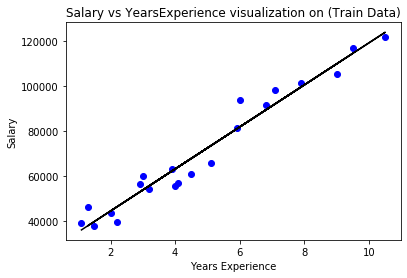

In [35]:
#Salary vs YearsExperience visualization on Train Data
plt.scatter(feature_train,target_train,color='Blue')
plt.plot(feature_train,LinReg.predict(feature_train),color='Black')
plt.title('Salary vs YearsExperience visualization on (Train Data)')
plt.xlabel('Years Experience')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

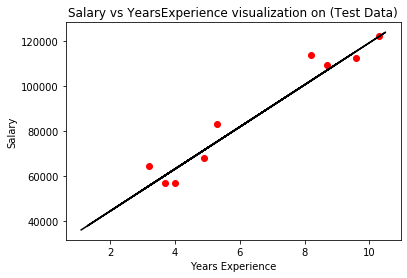

In [34]:
#Salary vs YearsExperience visualization on Test Data
plt.scatter(feature_test,target_test,color='Red')
plt.plot(feature_train,LinReg.predict(feature_train),color='Black')
plt.title('Salary vs YearsExperience visualization on (Test Data)')
plt.xlabel('Years Experience')
plt.ylabel('Salary')

In [38]:
#Finding metrics after Fitting and Predicting the Model
#R-Square
r_square = r2_score(target_test,LinReg.predict(feature_test))
print('R-Square Error:', r_square)

R-Square Error: 0.9414466227178214


In [48]:
#Mean Squared Error - MSE
y_predict = LinReg.predict(feature_test)
#mse = mean_squared_error(target_test,y_predict)
mse = mean_squared_error(target_test,y_predict)
print('Mean Squared Error:', mse)

Mean Squared Error: 37784662.46621314


In [49]:
#Root Mean Squared Error - RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 6146.92300799458


In [50]:
#Mean Absolute Error - MAE
mae = mean_absolute_error(target_test,y_predict)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 5161.328710400183


In [58]:
#Mean Absolute Percentage Error - MAPE
mape = (mae) * 100
print('Mean Absolute Percentage Error:', mape)

Mean Absolute Percentage Error: 516132.8710400183
